## Interference of multiple waves
The interference of multiple waves can lead to interesting phenomena. In particular, if the amplitude, frequency and phase of a sinusoidal wave are chosen with care, they can be used as building blocks to draw arbitrarily complex lineshapes. This intuition forms the basis of Fourier analysis. In the following we are going to use:

*   A sinusoidal basis set defined as $e_{k}(x)=sin(k \pi x)$
*   Wave amplitudes defined as $\tilde{f}_k=\frac{4}{k \pi} \, for \, k \, odd$ and $\tilde{f}_k = 0 \, for \ k \, even$

We then are going to define a final function built as a weighted sum of $e_{k}(x)$ as $f_N(x) = \sum_{k=1}^{N}\tilde{f}_k e_k(x)$



## Displaying $f_{N}(x)$ as a function of N
In the following we aim at writing a simple python code to:

*   Compute $f_{N}(x)$ for different values of N
*   Display $f_N(x)$
*   Display the single components of $f_N(x)$, i.e. ($\tilde{f}_k*e_k(x)$), for small values of $N \, (N<10)$



## Import relevant libraries

In [34]:
import numpy as np
import matplotlib.pylab as plt


## Basis sinusoidal function $e_k(x)$

In [35]:
def e(k,x):
  """
  Calculates the sine of k * pi * x.

  This function takes two arguments, k (an integer) and x,
  and returns the sine of their product multiplied by pi: sin(k * pi * x).

  Args:
  k: A non-negative integer.
  x: A numerical value representing the input value.

  Returns:
  The sine of k * pi * x.

  Raises:
  TypeError: If x is not a numerical value.

  Note: While technically not raised, it's good practice to mention potential errors.
  """

  assert isinstance(x, (int, float)) or isinstance(x,np.ndarray), "x must be a numerical value or x must be a numpy array"
  assert isinstance(k, int), "k must be an integer"
  assert k >= 0, "k must be non-negative"

  return np.sin(k * np.pi * x)

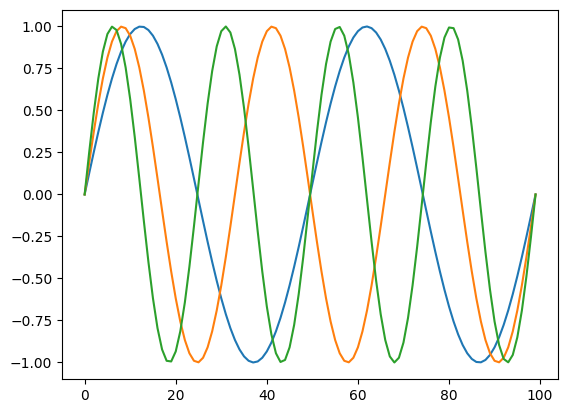

In [36]:
plt.plot(e(2,np.linspace(0,2,100)))
plt.plot(e(3,np.linspace(0,2,100)))
plt.plot(e(4,np.linspace(0,2,100)))

## Function amplitude $\tilde{f}_k$

In [37]:
def f_tilda(k):
  """Calculates the coefficient f_tilda_k for the sine series.

  This function takes a non-negative integer k and returns
  the coefficient f_tilda_k used in the sine series.

  Args:
  k: A non-negative integer.

  Returns:
  The coefficient f_tilda_k for the sine series.

  Raises:
  ValueError: If n is negative.

  Note: While technically not raised, it's good practice to mention potential errors.
  """

  assert isinstance(k, int), "k must be an integer"
  assert k >= 0, "k must be non-negative"

  if k % 2 == 0:
    return 0
  else:
    return 4 / (k * np.pi)

## Final function $f_{N}(x)$
For practical purposes we want the final implementation to have the following features:

*   The $x$ input must be a `numpy array` of size `n_points`
*   The function must return two outputs:
  * f_N: a `numpy array` of size `n_points` containing the values of $f_N(x) \, \forall \, x$
  * f_k: a 2D `numpy array` of shape `(N,n_points)` containing all the $\tilde{f}_k*e_k(x)$ components



In [42]:
def f(N: int, x: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
  """
  This function computes f_N and an intermediate arrays f_k.

  Args:
    N: An integer greater than or equal to 1.
    x: A 1D NumPy array of any size.

  Returns:
    tuple: A tuple containing two NumPy arrays.
      - f_N of size x.size.
      - f_k of shape (N, x.size).

  Raises:
    AssertionError:
      - If N is not an integer greater than or equal to 1.
      - If x is not a NumPy array.
  """

  # check inputs
  assert isinstance(N, int), "N must be an integer"
  assert N >= 1, "N must be greater than or equal to 1"
  assert isinstance(x, np.ndarray), "x must be a NumPy array"

  f_k = np.zeros((N, x.size))
  f_N = np.zeros(x.size)
  for k in range(1, N + 1):
    f_k[k - 1, :] = f_tilda(k) * e(k, x)
  f_N += f_k[k - 1, :]

  return f_N, f_k

## Inputs

In [43]:
n_points =  100 # sampling point on the x axis
x_min = 0.0  # minimum sampled coordinate
x_max = 2.0  # maximum sampled coordinate
x_input = np.linspace(x_min,x_max,n_points) # input vector of x coordinates
N = 15 # maximum order for the used basis function

## Compute the relevant quantitites

In [44]:
g_N, f_n = f(N,x_input)

## Plot results

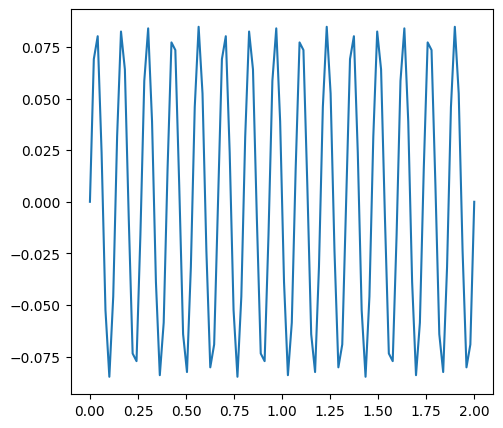

In [45]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x_input,g_N)

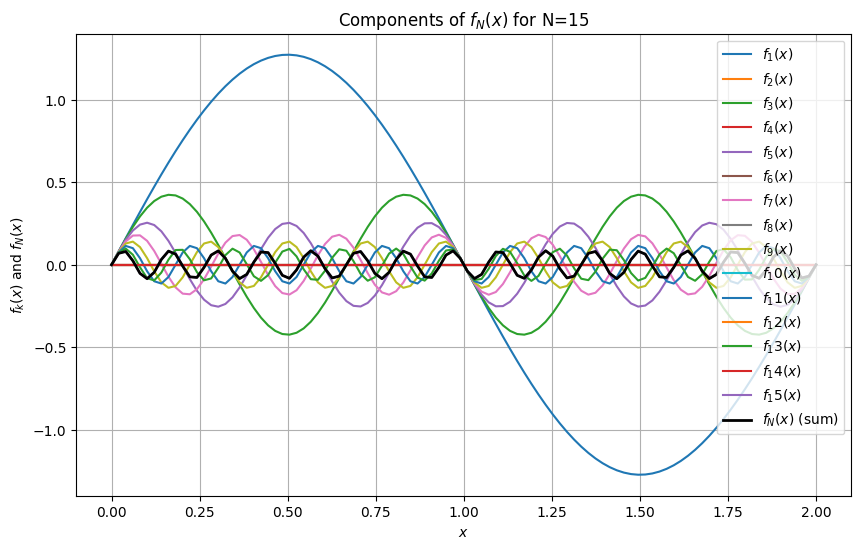

In [50]:
def plot_f_components(N: int, x: np.ndarray):
    """
    Plots the individual components f_k(x) = f_tilda(k) * e(k, x) and their sum f_N(x).

    Args:
      N: A small integer indicating the number of components.
      x: A NumPy array representing the x values.

    Raises:
      AssertionError if N is not within the expected range.
    """
    assert isinstance(N, int), "N must be an integer"
    assert isinstance(x, np.ndarray), "x must be a NumPy array"

    # Compute f_N and individual components
    f_N, f_k = f(N, x)

    plt.figure(figsize=(10, 6))

    # Plot each individual component
    for k in range(N):
        plt.plot(x, f_k[k, :], label=f"$f_{k+1}(x)$")

    # Plot the total sum
    plt.plot(x, f_N, 'k-', linewidth=2, label="$f_N(x)$ (sum)")

    # Formatting
    plt.xlabel("$x$")
    plt.ylabel("$f_k(x)$ and $f_N(x)$")
    plt.title(f"Components of $f_N(x)$ for N={N}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
N_small = 15  # Choose a small N for visualization
x_values = np.linspace(0, 2, 100)
plot_f_components(N_small, x_values)